In [1]:
from graph_plot import *
from degree_normalized_eigenvectors import *
from graph_class import Graph

In [2]:
# Adjacency matrix
A = np.loadtxt('../data/graph.txt')

f = open('../data/crack.graph', "r")

graph1 = Graph(f)
A = graph1.adj_matrix

# Degree matrix
D = np.diag(A.sum(axis=1))

# Laplacian matrix
L = D - A
print(graph1)

[graph object] nodes = 10240; edges = 30380


[0.01159312 0.00862435 0.02470036 ... 0.00245498 0.00211574 0.00258707] [-0.01927469 -0.00473239 -0.00613781 ...  0.01641395  0.0152482
  0.01523566]


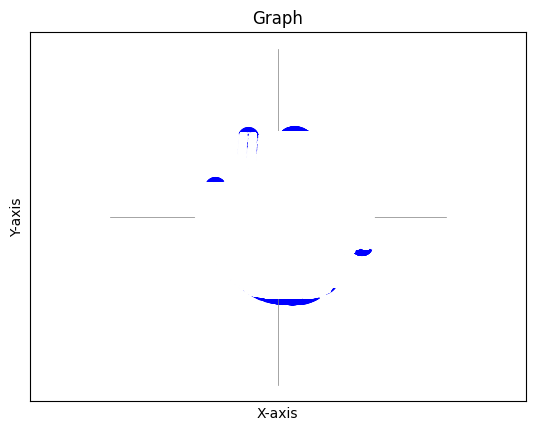

In [3]:
# Degree normalized eigenvectors
U = degree_normalized_eigenvectors(D, A, 2)

# 2D graph plot coordinates
x_coord = U[:, 0]
y_coord = U[:, 1]
print(x_coord, y_coord)

graph_plot(A, x_coord, y_coord)